In [45]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "../../data/dynamic_supply_chain_logistics_dataset.csv"
df = pd.read_csv(file_path)

df.head()

,timestamp,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,...,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,risk_classification,delivery_time_deviation
0,2021-01-01 00:00:00,40.375568,-77.014318,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,...,0.574400,0.777263,1.182116,0.502006,0.033843,0.978599,0.506152,0.885291,Moderate Risk,9.110682
1,2021-01-01 01:00:00,33.507818,-117.036902,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,...,-9.753493,0.091839,9.611988,0.966774,0.201725,0.918586,0.980784,0.544178,High Risk,8.175281
2,2021-01-01 02:00:00,30.020640,-75.269224,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,...,-6.491034,0.253529,6.570431,0.945627,0.264045,0.394215,0.998633,0.803322,High Risk,1.283594
3,2021-01-01 03:00:00,36.649223,-70.190529,8.219558,3.095064,0.045257,0.573283,0.530186,0.008525,0.811885,...,-0.151276,0.877576,0.548952,4.674035,0.362885,0.905444,0.993320,0.025977,High Risk,9.304897
4,2021-01-01 04:00:00,30.001279,-70.012195,5.000075,3.216077,8.004851,914.925067,3.620890,0.020083,0.053659,...,2.429448,0.262081,8.861443,3.445429,0.016957,0.258702,0.912433,0.991122,High Risk,7.752484


In [46]:
# Check Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32065 entries, 0 to 32064
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   timestamp                        32065 non-null  object 
 1   vehicle_gps_latitude             32065 non-null  float64
 2   vehicle_gps_longitude            32065 non-null  float64
 3   fuel_consumption_rate            32065 non-null  float64
 4   eta_variation_hours              32065 non-null  float64
 5   traffic_congestion_level         32065 non-null  float64
 6   warehouse_inventory_level        32065 non-null  float64
 7   loading_unloading_time           32065 non-null  float64
 8   handling_equipment_availability  32065 non-null  float64
 9   order_fulfillment_status         32065 non-null  float64
 10  weather_condition_severity       32065 non-null  float64
 11  port_congestion_level            32065 non-null  float64
 12  shipping_costs    

In [47]:
# Check Null Value
df.isnull().sum()

timestamp                          0
vehicle_gps_latitude               0
vehicle_gps_longitude              0
fuel_consumption_rate              0
eta_variation_hours                0
traffic_congestion_level           0
warehouse_inventory_level          0
loading_unloading_time             0
handling_equipment_availability    0
order_fulfillment_status           0
weather_condition_severity         0
port_congestion_level              0
shipping_costs                     0
supplier_reliability_score         0
lead_time_days                     0
historical_demand                  0
iot_temperature                    0
cargo_condition_status             0
route_risk_level                   0
customs_clearance_time             0
driver_behavior_score              0
fatigue_monitoring_score           0
disruption_likelihood_score        0
delay_probability                  0
risk_classification                0
delivery_time_deviation            0
dtype: int64

In [48]:
numerical_list = [x for x in df.columns if df[x].dtype in ('int64','float64')]
print(numerical_list)

['vehicle_gps_latitude', 'vehicle_gps_longitude', 'fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability', 'order_fulfillment_status', 'weather_condition_severity', 'port_congestion_level', 'shipping_costs', 'supplier_reliability_score', 'lead_time_days', 'historical_demand', 'iot_temperature', 'cargo_condition_status', 'route_risk_level', 'customs_clearance_time', 'driver_behavior_score', 'fatigue_monitoring_score', 'disruption_likelihood_score', 'delay_probability', 'delivery_time_deviation']


In [49]:
from sklearn.preprocessing import MinMaxScaler
# Cleaning Data

df_cleaned = df.drop(columns=['risk_classification'])
df_cleaned = df_cleaned.drop(columns=['timestamp'])

# Handle missing values (remove rows with missing data)
df_cleaned = df_cleaned.dropna()

# Detect and remove outliers using the IQR method
for i in numerical_list:
    Q1 = df_cleaned[i].quantile(0.25)
    Q3 = df_cleaned[i].quantile(0.75)
    IQR = Q3 - Q1
    df_cleaned = df_cleaned[df_cleaned[i] <= (Q3+(1.5*IQR))]
    df_cleaned = df_cleaned[df_cleaned[i] >= (Q1-(1.5*IQR))]
    df_cleaned = df_cleaned.reset_index(drop=True)
# Define acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Normalize numerical features using Min-Max Scaling
scaler = MinMaxScaler()
df_cleaned[df_cleaned.columns] = scaler.fit_transform(df_cleaned[df_cleaned.columns])

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25245 entries, 0 to 25244
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   vehicle_gps_latitude             25245 non-null  float64
 1   vehicle_gps_longitude            25245 non-null  float64
 2   fuel_consumption_rate            25245 non-null  float64
 3   eta_variation_hours              25245 non-null  float64
 4   traffic_congestion_level         25245 non-null  float64
 5   warehouse_inventory_level        25245 non-null  float64
 6   loading_unloading_time           25245 non-null  float64
 7   handling_equipment_availability  25245 non-null  float64
 8   order_fulfillment_status         25245 non-null  float64
 9   weather_condition_severity       25245 non-null  float64
 10  port_congestion_level            25245 non-null  float64
 11  shipping_costs                   25245 non-null  float64
 12  supplier_reliabili

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_cleaned.drop(labels=['delivery_time_deviation'], axis=1), df_cleaned['delivery_time_deviation'], test_size=0.3, random_state=0)

X_train

,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,weather_condition_severity,...,lead_time_days,historical_demand,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability
5275,0.642806,0.961875,0.620501,0.775454,0.880323,0.397385,0.001190,0.654412,0.080255,0.025512,...,6.501084e-01,0.996918,1.860630e-01,5.046073e-01,0.833030,0.712385,0.021193,0.003938,0.998705,0.224432
13764,0.009392,0.368921,0.007433,0.865253,0.125204,0.894434,0.783861,0.000365,0.194083,0.964390,...,7.930618e-01,0.726163,6.622181e-01,7.996882e-02,0.935379,0.945000,0.986846,0.903971,0.935540,0.846907
4323,0.416008,0.898929,0.001832,0.957132,0.612763,0.014708,0.048898,0.207350,0.998589,0.957154,...,9.213419e-03,0.809213,7.577090e-07,1.034855e-02,0.223571,0.275738,0.646012,0.633143,1.000000,0.733436
7269,0.000003,0.865464,0.393692,0.888687,0.994402,0.694398,0.806682,0.000242,0.999989,0.069880,...,1.978084e-02,0.465149,2.863985e-05,4.107138e-01,0.985439,0.909406,0.025519,0.309086,0.654027,0.935492
8108,0.071795,0.785682,0.201395,0.883340,0.230176,0.004588,0.000379,0.014303,0.424961,0.017113,...,4.862115e-01,0.194604,9.899594e-04,3.414656e-02,0.701161,0.040038,0.286909,0.978160,0.999997,0.551618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.982399,0.263962,0.342251,0.621432,0.375201,0.372424,0.423863,0.119301,0.568734,0.457669,...,1.546825e-02,0.898171,6.594684e-01,4.919663e-02,0.030580,0.029757,0.021079,0.990071,1.000000,0.835694
19648,0.601147,0.999934,0.164219,0.999880,0.320097,0.408771,0.303822,0.000004,0.997537,0.386600,...,4.287112e-01,0.646852,9.293606e-01,5.821294e-01,0.961974,0.274420,0.554307,0.878497,0.997936,0.707540
9845,0.878645,0.512895,0.376640,0.318310,0.994526,0.662366,0.499090,0.225647,0.234544,0.553445,...,9.428281e-07,0.532458,3.671872e-04,4.876389e-02,0.835013,0.099382,0.522795,0.990270,0.983162,0.326213
10799,0.405827,0.000875,0.001407,1.000000,0.690520,0.010847,0.984065,0.007387,0.869980,0.977939,...,5.381649e-01,0.964316,4.238930e-01,4.129165e-07,0.966096,0.000430,0.621926,0.727836,0.798389,0.675077


In [51]:
y_train

5275     0.003962
13764    0.215003
4323     0.678794
7269     0.387532
8108     0.233673
           ...   
13123    0.637941
19648    0.833383
9845     0.945118
10799    0.101226
2732     0.447438
Name: delivery_time_deviation, Length: 17671, dtype: float64

In [52]:
#Feature Selection
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.        , 0.00228166, 0.01277703, 0.        , 0.00935836,
       0.        , 0.00594511, 0.00447123, 0.00175406, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00750241, 0.        , 0.0092308 , 0.        , 0.        ,
       0.        , 0.        , 0.01153919])

In [53]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

fuel_consumption_rate              0.012777
delay_probability                  0.011539
traffic_congestion_level           0.009358
route_risk_level                   0.009231
iot_temperature                    0.007502
loading_unloading_time             0.005945
handling_equipment_availability    0.004471
vehicle_gps_longitude              0.002282
order_fulfillment_status           0.001754
vehicle_gps_latitude               0.000000
eta_variation_hours                0.000000
warehouse_inventory_level          0.000000
shipping_costs                     0.000000
weather_condition_severity         0.000000
port_congestion_level              0.000000
historical_demand                  0.000000
lead_time_days                     0.000000
supplier_reliability_score         0.000000
cargo_condition_status             0.000000
customs_clearance_time             0.000000
driver_behavior_score              0.000000
fatigue_monitoring_score           0.000000
disruption_likelihood_score     

<Axes: >

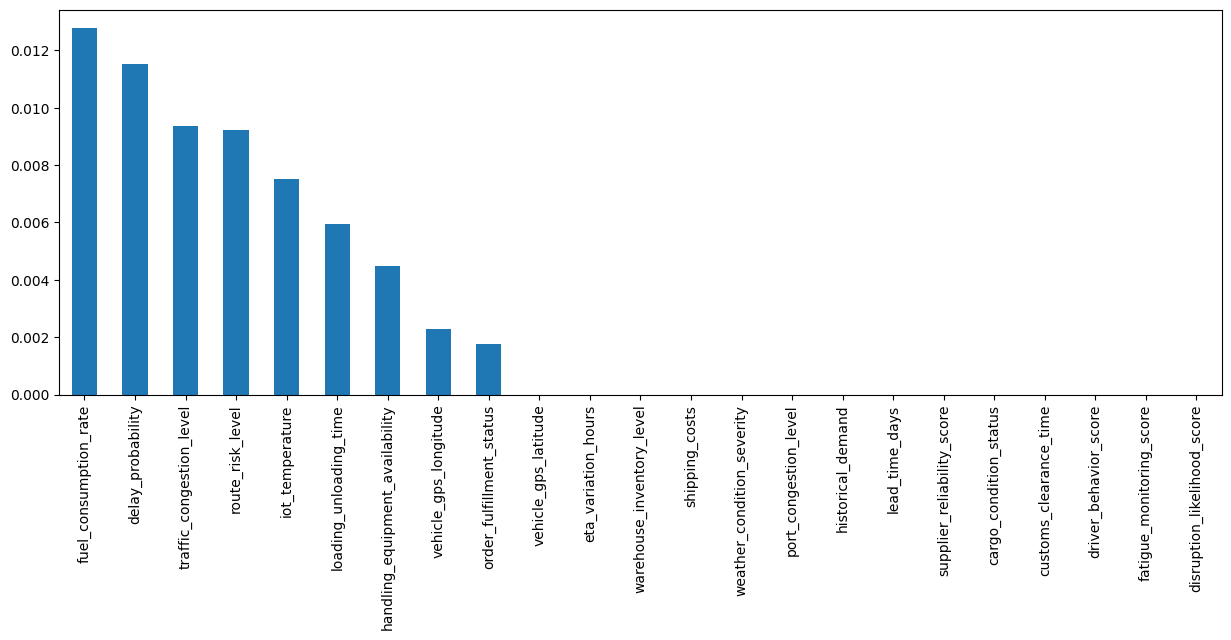

In [54]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [55]:
# @title 1st option - build from scratch
class LinearRegressionScratch:
    """
    Custom implementation of linear regression using gradient descent.
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.coef_ = None
        self.intercept_ = None
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        """
        Fits the linear regression model to the given data using gradient descent.
        Args:
            X: A numpy array of shape (n_samples, n_features) representing the input data.
            y: A numpy array of shape (n_samples,) representing the target values.
        """
        # Initialize coefficients (slope) and intercept to zero or random small values
        self.coef_ = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
        self.intercept_ = np.mean(y - np.dot(X, self.coef_))

        m = len(y)  # number of training examples

        for _ in range(self.n_iterations):
            # Calculate the predictions
            y_pred = self.predict(X)

            # Compute the residuals (errors)
            error = (y_pred - y)

            # Calculate the gradient for intercept (slope) and coefficients (slope)
            intercept_gradient = (1/m) * np.sum(error)
            coef_gradient = (1/m) * np.dot(X.T, error)

            # Update the parameters using the gradients
            self.intercept_ -= self.learning_rate * intercept_gradient
            self.coef_ -= self.learning_rate * coef_gradient

    def predict(self, X):
        """
        Predicts the target values for new data.
        Args:
            X: A numpy array of shape (n_samples, n_features) representing the new input data.
        Returns:
            A numpy array of shape (n_samples,) representing the predicted target values.
        """
        return np.dot(X, self.coef_) + self.intercept_

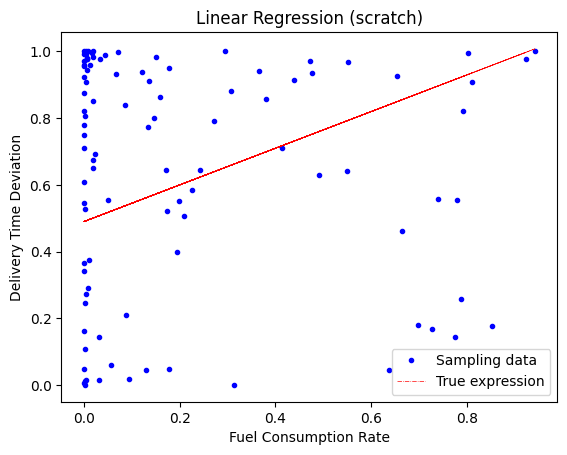


Model Evaluation:
Mean Absolute Error (MAE): 0.3270
Mean Squared Error (MSE): 0.1422
Root Mean Squared Error (RMSE): 0.3771
R-squared (R²): -0.1765


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
#Prepare Data
X = df_cleaned['fuel_consumption_rate'].to_numpy().reshape(-1, 1)
y = df_cleaned['delivery_time_deviation'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

lin_reg_scratch = LinearRegressionScratch()
lin_reg_scratch.fit(X_train, y_train)

y_pred = lin_reg_scratch.predict(X_test)

plt.plot(X_test[:100], y_test[:100], "b.", label='Sampling data')
plt.plot(X_test[:100], y_pred[:100], "r-.", label='True expression', linewidth=0.5)
# plt.axis([0, 2, 0, 15])

# ตั้งชื่อแกน X และ Y
plt.xlabel('Fuel Consumption Rate')
plt.ylabel('Delivery Time Deviation')

plt.title('Linear Regression (scratch)')
plt.legend()
plt.show()

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")